Intercept (β₀): 1.72
Coefficients Slopes(β₁, β₂, β₃, β₄): [1.97320904 0.11806371 0.20019818 2.57642763]
R²: 1.00
The magnitude of the coefficients (in absolute value) indicates the strength of the effect
The sign (+ or −) indicates the direction of the effect (increase or decrease)
β4 => (Managerial Experience years) and β1 => (Years of Experience most effected on salary)


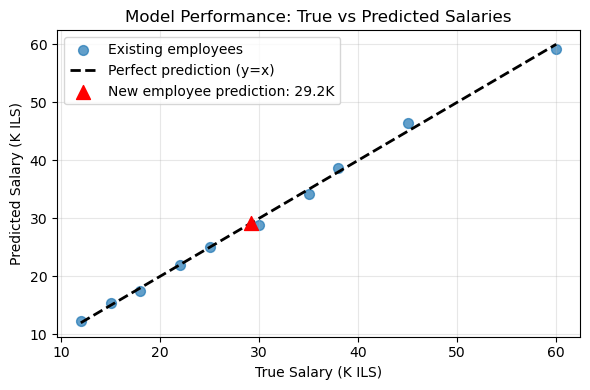

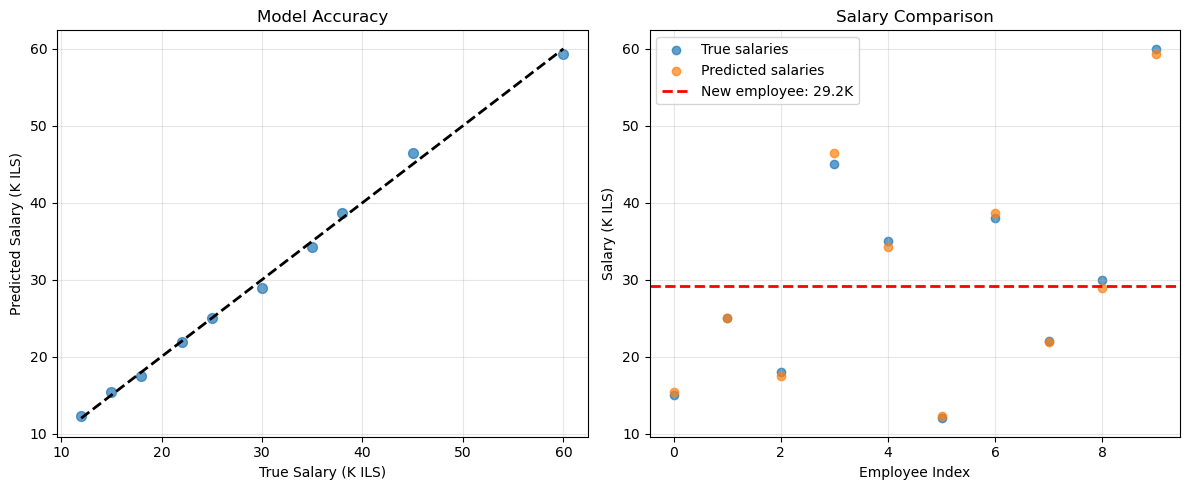

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Years of Experience | Education (years) | Weekly Work Hours | Managerial Experience (years) | Monthly Salary (K ILS)
# 2                   | 15                 | 40                | 0                             | 15
# 5                   | 16                 | 45                | 1                             | 25
# 3                   | 16                 | 40                | 0                             | 18
# 10                  | 18                 | 50                | 5                             | 45
# 7                   | 17                 | 45                | 3                             | 35
# 1                   | 14                 | 35                | 0                             | 12
# 8                   | 16                 | 45                | 4                             | 38
# 4                   | 15                 | 40                | 1                             | 22
# 6                   | 15                 | 42                | 2                             | 30
# 12                  | 19                 | 55                | 8                             | 60

# Original dataset
X = np.array([
    [2, 15, 40, 0],
    [5, 16, 45, 1],
    [3, 16, 40, 0],
    [10, 18, 50, 5],
    [7, 17, 45, 3],
    [1, 14, 35, 0],
    [8, 16, 45, 4],
    [4, 15, 40, 1],
    [6, 15, 42, 2],
    [12, 19, 55, 8]
])

y = np.array([15, 25, 18, 45, 35, 12, 38, 22, 30, 60])

# Build and train the model
model = LinearRegression()
model.fit(X, y)

# Predict for the existing dataset
y_pred = model.predict(X)

# Predict for a new employee
new_employee = np.array([[6, 16, 43, 2]])
predicted_salary = model.predict(new_employee)[0]

# Get coefficients
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficients Slopes(β₁, β₂, β₃, β₄): {model.coef_}")
print(f"R²: {model.score(X, y):.2f}")
print("The magnitude of the coefficients (in absolute value) indicates the strength of the effect")
print("The sign (+ or −) indicates the direction of the effect (increase or decrease)")
print("β4 => (Managerial Experience years) and β1 => (Years of Experience most effected on salary)")

# Visualization: True vs Predicted with new employee
plt.figure(figsize=(6, 4))

# Scatter plot of existing data: true vs predicted
plt.scatter(y, y_pred, s=50, alpha=0.7, label="Existing employees")

# Perfect prediction line y = x
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label="Perfect prediction (y=x)")

# Mark the new employee prediction on the perfect line
plt.scatter(predicted_salary, predicted_salary, color="red", s=100,
           marker="^", label=f"New employee prediction: {predicted_salary:.1f}K", zorder=5)

plt.xlabel("True Salary (K ILS)")
plt.ylabel("Predicted Salary (K ILS)")
plt.title("Model Performance: True vs Predicted Salaries")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization: Two subplots (accuracy and comparison)
plt.figure(figsize=(12, 5))

# Left subplot: True vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, s=50, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2)
plt.xlabel("True Salary (K ILS)")
plt.ylabel("Predicted Salary (K ILS)")
plt.title("Model Accuracy")
plt.grid(True, alpha=0.3)

# Right subplot: Salary comparison including new employee
plt.subplot(1, 2, 2)
plt.scatter(range(len(y)), y, label="True salaries", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted salaries", alpha=0.7)
plt.axhline(y=predicted_salary, color="red", linestyle="--", linewidth=2,
           label=f"New employee: {predicted_salary:.1f}K")
plt.xlabel("Employee Index")
plt.ylabel("Salary (K ILS)")
plt.title("Salary Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
